In [1]:
import pandas as pd
import numpy as np
import os

to do:
    
    compute small and large separations
    
    fazer um gráfico sobre as frequências mais pequenas e comentar, como no paper
    
    fazer grafico como fig 1 e fig 2 do paper 1
    
    echelle diagram, fig 4 do paper II

In [2]:
dir = "/home/rita13santos/Desktop/AstrophysicsLaboratory/StellarOscilations/DATA/"

In [3]:
count = 0
for path in os.listdir(dir):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir, path)):
        count += 1
print('File count in dir', dir, 'is: ', count)

File count in dir /home/rita13santos/Desktop/AstrophysicsLaboratory/StellarOscilations/DATA/ is:  4


# Reading and writing to an array all data from the 4 given files

In [ ]:
files=['data2calib1pm1.txt','data2calib1pm2.txt','data2calib2pm1.txt','data2calib2pm2.txt']
# 4 * 197640 = 790560 (total number of files)

data = []

for i in range(count):

    df = pd.read_fwf(dir+files[i], header=None)

    #print(df.iloc[:, 0])

    cols = []

    col1 = df.iloc[:, 0]
    col1 = col1.to_numpy()
    cols.append(col1)

    col2 = df.iloc[:, 1]
    col2 = col2.to_numpy()
    cols.append(col2)

    col3 = df.iloc[:, 2]
    col3 = col3.to_numpy()
    cols.append(col3)

    col4 = df.iloc[:, 3]
    col4 = col4.to_numpy()
    cols.append(col4)

    cols=np.transpose(cols)

    total_data = []
    for i in range(len(cols)):
        total_data = np.concatenate((total_data,cols[i]))

    print('len total data is', len(total_data))
    print('total_data=',total_data)
    
    data.append(total_data)

print(len(data))

len total data is 790560
total_data= [ 1.50149   2.30147   2.62921  ... -0.742475 -0.372451 -0.705769]


In [21]:
print(count)

4


Write all data for each calibration and photomultiplier in just one row

In [ ]:
import csv

for i in range(len(data)):
    with open('data{}.csv'.format(i), 'w', encoding='UTF8', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(data[i])

Read all data for each calibration and photomultiplier in just one row

# Plotting timeseries of 1st file

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
tips = sns.load_dataset('tips')

#183 days
plt_x = np.linspace(0, 182, 790560)
print(plt_x)
print(len(plt_x))


with plt.style.context('fivethirtyeight'):
    #plt.scatter(plt_x, data[0], linewidth=1,cmap = 'Blues', alpha=0.4,s=5,c=plt_x)
    plt.rcParams.update({'font.size': 12})    
    plt.rcParams["figure.figsize"] = (10,5)
    plt.scatter(plt_x, data[0], cmap = 'Blues', alpha=0.8,s=1)
    plt.plot(plt_x, data[0], linewidth=0.1, alpha=0.8)

plt.xlabel('Time (days)')
plt.ylabel('Residual velocity (m/s)')
plt.show()

titles = ['Method 1, Photomultiplier 1','Method 1, Photomultiplier 2','Method 2, Photomultiplier 1','Method 2, Photomultiplier 2']
# making 4 plot image    
with plt.style.context('bmh'):
    
    plt.rcParams.update({'font.size': 12})    
    plt.rcParams["figure.figsize"] = (10,10)
    
    fig, ax = plt.subplots(4, 1,figsize=(10, 15))
    plt.subplots_adjust(hspace=0.5)


    for i in range(len(data)):


        ax[i].set_title(titles[i])

        ax[i].scatter(plt_x, data[i], cmap = 'Blues', alpha=0.8,s=1)
    
        ax[i].plot(plt_x, data[i], linewidth=0.1, alpha=0.8)

        ax[i].set_xlabel('Time (days)')

        ax[i].set_ylabel('Velocity')
    
    plt.show()
    



In [ ]:
# From Pythonic: Applying Fourier Transform In Python Using Numpy.fft 

# How many time points are needed i,e., Sampling Frequency
samplingFrequency   = 1/20;
#samplingFrequency   = 1/20*10**(-6);

# At what intervals time points are sampled
samplingInterval       = 1 / samplingFrequency;
#samplingInterval       = 20*10**6

# Begin time period of the signals
beginTime           = 0; 

# End time period of the signals
endTime             = 182*24*60*60; 
 
# Time points
time        = np.arange(beginTime, endTime, samplingInterval);


freqs=[]
FT=[]
# Perform FFT of the 4 given files
with plt.style.context('bmh'):
    plt.rcParams.update({'font.size': 12})
    
    fig, ax = plt.subplots(2, 1,figsize=(10, 15))

    tpCount     = len(data[0])
    values      = np.arange(int(tpCount/2))
    timePeriod  = tpCount/samplingFrequency
    frequencies = values/timePeriod*1000
    freqs.append(frequencies)

    for i in range(len(data)-2):

        # Frequency domain representation
        fourierTransform = np.fft.fft(data[i])/len(data[i])           # Normalize amplitude
        fourierTransform = fourierTransform[range(int(len(data[i])/2))] # Exclude sampling frequency
        FT.append(abs(fourierTransform))


        if (i == 0 or i == 1):
            ax[i].set_xlim([1.5,5])
        else:
            ax[i].set_ylim([0,0.1])
            ax[i].set_xlim([1.5,5])

        ax[i].set_title('Acoustic p-mode spectrum of the Sun ('+titles[i]+')')

        ax[i].scatter(frequencies, abs(fourierTransform), cmap = 'Blues', alpha=1, s=2.5)
        ax[i].plot(frequencies, abs(fourierTransform), linewidth=0.4, alpha=0.8)

        ax[i].set_xlabel('Frequency (mHz)')

        ax[i].set_ylabel('Power Density ((m/s)²/Hz)')
    
    plt.show()

Plots style definitions

In [ ]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams.update({'font.size': 12})

Analysis of data[0] (this is the zone analysed in the paper)

In [ ]:
with plt.style.context('bmh'):
    plt.rcParams.update({'font.size': 12})
    fig, ax = plt.subplots(figsize=(10, 6))

    ax.set_xlim([2.920, 3.0600])

    ax.set_title('Fourier transform depicting the frequency components')

    ax.plot(freqs[0], FT[0],linewidth=1)

    ax.set_xlabel('Frequency *10³ ')

    ax.set_ylabel('Amplitude')

    plt.show()

Defining fit function

In [ ]:
import math
from scipy.optimize import curve_fit

def lorentz(x, A, sigma, x0):
    y = A/math.pi*(sigma)/((x-x0)**2+(sigma)**2)
    return y

def gauss(x, A, B):
    y = A*np.exp(-1*B*x**2)
    return y

0.00011851069539714505
4.63243493976547e-09
[1.13553249e-04 1.44038154e-03 2.96358585e+00]
0.00399889530438759


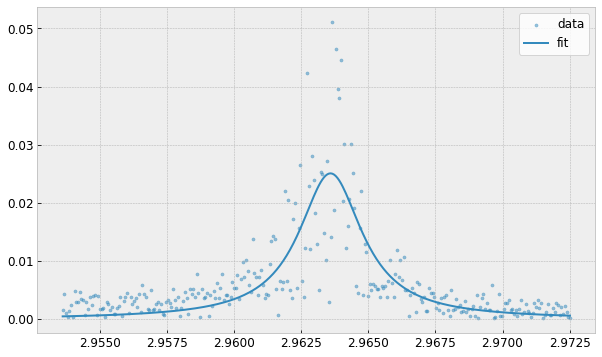

In [22]:
xdata = freqs[0][46700:47000]
ydata  = FT[0][46700:47000]

# fit
guess = [200, 0.0002, 2.96358]

pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_A = pars[0]
fit_sigma = pars[1]
fit_x0 = pars[2]

fit_y = lorentz(xdata, fit_A, fit_sigma, fit_x0)
with plt.style.context('bmh'):
    plt.rcParams.update({'font.size': 12})
    plt.scatter(xdata, ydata, label='data', s=10, alpha=0.5)
    plt.plot(xdata, fit_y, '-', label='fit')
plt.legend()

sigma_squared = np.sqrt(cov[0][0]+cov[1][1]+cov[2][2])
print(sigma_squared)
print(cov[2][2])

print(pars)
print(0.00011851069539714505/2.96358585*100) # erro é ~0.0040 % mais pequeno do que a frequencia... hm

# Fit to more peaks

Fitting peaks with frequencies between 2.6563448694596232 and 3.668285772110909

2.8018113742157458
3.2002631046346894


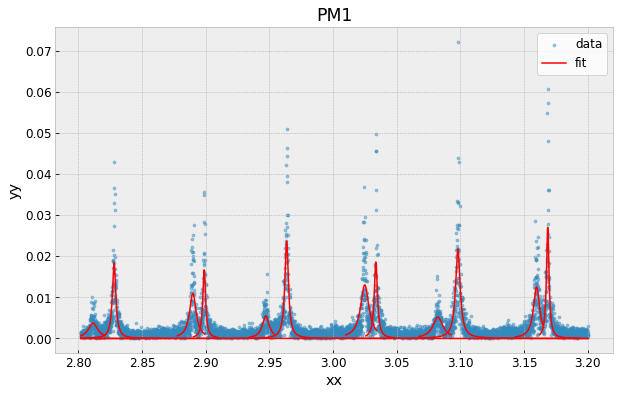

[2.811517152646446, 2.8280574248570343, 2.8899131722863713, 2.898807801438619, 2.9471973587864397, 2.9635477160024823, 3.024888025731724, 3.0336297536557364, 3.0823303435875706, 3.0980123869896374, 3.1598429468912683, 3.1686066415655336]


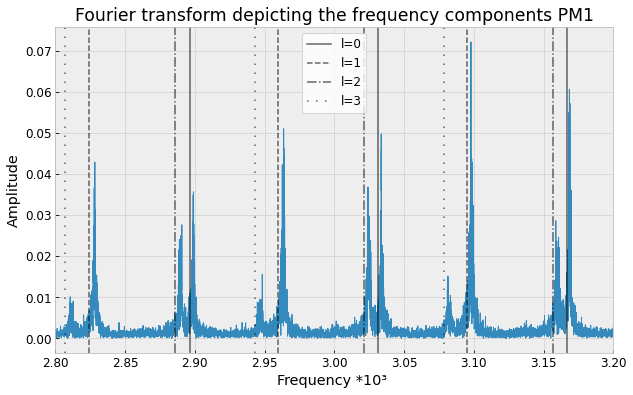

In [26]:
fitted_frequencies_pm1 = []

print(freqs[0][44300])
print(freqs[0][50600])

xdata = freqs[0][44300:50600]
ydata  = FT[0][44300:50600]
with plt.style.context('bmh'):
    plt.scatter(xdata, ydata, cmap = 'Blues', label='data', s=10, alpha=0.5)
    plt.rcParams.update({'font.size': 12})
    plt.rcParams['figure.figsize'] = (10, 6)
    plt.title('PM1')
    plt.xlabel('xx')
    plt.ylabel('yy')
    

### fit 1 ###
guess = [200, 0.0002, 2.96358]

pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

plt.plot(xdata, fit_y, '-', label='fit',color='red')

fitted_frequencies_pm1.append(pars[2])

### fit 2 ###
guess = [100, 0.002, 3.099]

pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

plt.plot(xdata, fit_y, '-', color='red')
    
fitted_frequencies_pm1.append(pars[2])

### fit 3 ###
xdata = freqs[0][45500:45840]
ydata  = FT[0][45500:45840]
guess = [300, 0.00002, 2.889]

pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

plt.plot(xdata, fit_y, '-',color='red')

fitted_frequencies_pm1.append(pars[2])

### fit 4 ###

xdata = freqs[0][45700:46000]
ydata  = FT[0][45700:46000]
guess = [300, 0.00002, 2.90]

pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

plt.plot(xdata, fit_y, '-', color='red')
    
fitted_frequencies_pm1.append(pars[2])

### fit 5 ###

xdata = freqs[0][46400:46700]
ydata  = FT[0][46400:46700]
guess = [50, 0.00002, 2.9472]

pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

plt.plot(xdata, fit_y, '-', color='red')

fitted_frequencies_pm1.append(pars[2])

### fit 6 ###

xdata = freqs[0][47590:47980]
ydata  = FT[0][47590:47980]
guess = [399, 0.00002, 3.024]

pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

plt.plot(xdata, fit_y, '-', color='red')

fitted_frequencies_pm1.append(pars[2])

### fit 7 ###

xdata = freqs[0][47840:48200]
ydata  = FT[0][47840:48200]
guess = [300, 0.00002, 3.026]

pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

plt.plot(xdata, fit_y, '-', color='red')

fitted_frequencies_pm1.append(pars[2])

### fit 8 ###

xdata = freqs[0][48500:48900]
ydata  = FT[0][48500:48900]
guess = [30, 0.00002, 3.082]

pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

plt.plot(xdata, fit_y, '-',color='red')

fitted_frequencies_pm1.append(pars[2])

### fit 9 ###

xdata = freqs[0][44300:45300]
ydata  = FT[0][44300:45300]
guess = [30, 0.00002, 2.81]

pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

plt.plot(xdata, fit_y, '-',color='red')

fitted_frequencies_pm1.append(pars[2])

### fit 10 ###

xdata = freqs[0][44300:44600]
ydata  = FT[0][44300:44600]
guess = [30, 0.00002, 2.81]

pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

plt.plot(xdata, fit_y, '-',color='red')

fitted_frequencies_pm1.append(pars[2])

### fit 11 ###

xdata = freqs[0][49700:50050]
ydata  = FT[0][49700:50050]
guess = [30, 0.00002, 3.16]

pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

plt.plot(xdata, fit_y, '-',color='red')

fitted_frequencies_pm1.append(pars[2])

### fit 12 ###

xdata = freqs[0][50000:50500]
ydata  = FT[0][50000:50500]
guess = [30, 0.00002, 3.17]

pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

plt.plot(xdata, fit_y, '-',color='red')

fitted_frequencies_pm1.append(pars[2])

plt.legend()
plt.show()
fitted_frequencies_pm1.sort()
print(fitted_frequencies_pm1)

##### theoretical frequencies #####

with plt.style.context('bmh'):
    plt.xlim([2.8, 3.2])
    plt.title('Fourier transform depicting the frequency components PM1')
    plt.xlabel('Frequency *10³ ')
    plt.ylabel('Amplitude')
    plt.plot(xdata1, ydata1, linewidth=1, alpha=1)
    #plt.plot(xdata2, ydata2, label='PM2', linewidth=1, alpha=1)

k = 0
for i in frequencies_theory_l0:
    k +=1
    if k == 1:
        plt.axvline(x = i, color = 'black', linestyle = 'solid', label = 'l=0', alpha=0.6)
    else:
        plt.axvline(x = i, color = 'black', linestyle = 'solid', alpha=0.6)
        
k = 0
for i in frequencies_theory_l1:
    k +=1
    if k == 1:
        plt.axvline(x = i, color = 'black', linestyle = '--', label = 'l=1', alpha=0.6)
    else:
        plt.axvline(x = i, color = 'black', linestyle = '--', alpha=0.6)
        
k = 0
for i in frequencies_theory_l2:
    k +=1
    if k == 1:
        plt.axvline(x = i, color = 'black', linestyle = 'dashdot', label = 'l=2', alpha=0.6)
    else:
        plt.axvline(x = i, color = 'black', linestyle = 'dashdot', alpha=0.6)
        
k = 0
for i in frequencies_theory_l3:
    k +=1
    if k == 1:
        plt.axvline(x = i, color = 'black', linestyle = (0, (1,5)), label = 'l=3', alpha=0.6)
    else:
        plt.axvline(x = i, color = 'black', linestyle = (0, (1,5)), alpha=0.6)
        


plt.legend()

plt.show()

just plotting to look at theoretical frequencies and the fitted ones

# Computing large separation for the fitted frequencies

n is ordem radial; l is graus
1 coluna      = grau, 
2 coluna      = ordem radial,
ultima coluna = frequencia propria (mHz)

In [ ]:
frequencies_theory_l0 = [0.535308, 0.679501, 0.970528, 1.115391, 1.260426, 1.403781, 1.543825, 1.681478, 1.817298, 1.953574, 2.090097, 2.225231, 2.359319, 2.492708, 2.626554, 2.761449, 2.896414, 3.031626, 3.16692, 3.302485, 3.438826, 3.575348, 3.712182, 3.849159, 3.986249, 4.123775, 4.261271, 4.398846, 4.536387, 4.673751, 4.946911, 5.095484, 5.234301, 5.373123, 5.512118, 5.65101, 5.78991, 5.928871, 6.067785, 6.206761, 6.345584, 6.48434, 6.62311, 6.761761, 7.038738, 7.176977, 7.315157, 7.453125, 7.590913]
frequencies_theory_l1 = [0.891473, 1.036782, 1.182289, 1.325785, 1.468123, 1.606647, 1.743139, 1.879592, 2.015963, 2.152349, 2.28712, 2.42074, 2.554625, 2.689054, 2.824228, 2.959557, 3.094791, 3.23037, 3.366419, 3.502967, 3.639851, 3.776819, 3.913997, 4.051451, 4.189064, 4.326765, 4.464404, 4.601967, 4.739407, 4.876241, 5.023275, 5.162115, 5.301017, 5.44002, 5.579044, 5.718011, 5.857005, 5.996009, 6.135015, 6.273986]
frequencies_theory_l2 = [0.957193, 1.101802, 1.246902, 1.390052, 1.530353, 1.668165, 1.804061, 1.940584, 2.077293, 2.212784, 2.34722, 2.480858, 2.615009, 2.750181, 2.885445, 3.02098, 3.156551, 3.292407, 3.42903, 3.565824, 3.702942, 3.840181, 3.977531, 4.115312, 4.253053, 4.390873, 4.528647, 4.66624, 4.803671, 4.939921, 5.088536, 5.227532, 5.366524, 5.505683, 5.644735, 5.783787, 5.922895, 6.06195, 6.201058]
frequencies_theory_l3 = [0.864609, 1.012056, 1.158037, 1.302591, 1.445901, 1.585199, 1.722534, 1.859199, 1.995954, 2.132971, 2.268246, 2.402443, 2.536677, 2.671394, 2.807062, 2.942791, 3.078497, 3.214521, 3.350926, 3.487938, 3.625222, 3.762608, 3.900194, 4.037984, 4.175992, 4.314043, 4.452032, 4.589953, 4.727719, 4.864958, 4.999742, 5.151218, 5.290399, 5.429645, 5.56893, 5.708133, 5.847348, 5.986578, 6.125788, 6.264974]

frequencies_theory_n_l0 = [[3,0.535308], [4,0.679501], [6,0.970528], [7,1.115391], [8,1.260426], [9,1.403781], [10,1.543825], [11,1.681478], [12,1.817298], [13,1.953574], [14,2.090097], [15,2.225231], [16,2.359319], [17,2.492708], [18,2.626554], [19,2.761449], [20,2.896414], [21,3.031626], [22,3.16692], [23,3.302485], [24,3.438826], [25,3.575348], [26,3.712182], [27,3.849159], [28,3.986249], [29,4.123775], [30,4.261271], [31,4.398846], [32,4.536387], [33,4.673751], [35,4.946911], [36,5.095484], [37,5.234301], [38,5.373123], [39,5.512118], [40,5.65101], [41,5.78991], [42,5.928871], [43,6.067785], [44,6.206761], [45,6.345584], [46,6.48434], [47,6.62311], [48,6.761761], [50,7.038738], [51,7.176977], [52,7.315157], [53,7.453125], [54,7.590913]]
frequencies_theory_n_l1 = [[5,0.891473],[6,1.036782],[7,1.182289],[8,1.325785],[9,1.468123],[10,1.606647],[11,1.743139],[12,1.879592],[13,2.015963],[14,2.152349],[15,2.28712],[16,2.42074],[17,2.554625],[18,2.689054],[19,2.824228],[20,2.959557],[21,3.094791],[22,3.23037],[23,3.366419],[24,3.502967],[25,3.639851],[26,3.776819],[27,3.913997],[28,4.051451],[29,4.189064],[30,4.326765],[31,4.464404],[32,4.601967],[33,4.739407],[34,4.876241],[35,5.023275],[36,5.162115],[37,5.301017],[38,5.44002],[39,5.579044],[40,5.718011],[41,5.857005],[42,5.996009],[43,6.135015],[44,6.273986]]


In [27]:
# PM1
xdata1 = freqs[0]
ydata1  = FT[0]
# PM2
xdata2 = freqs[0]
ydata2  = FT[1]

Data about the large separation of the peaks shown above is written in the google sheets.

# Computing the same separations but with data from PM 2

2.795486743574175
3.193938473993119


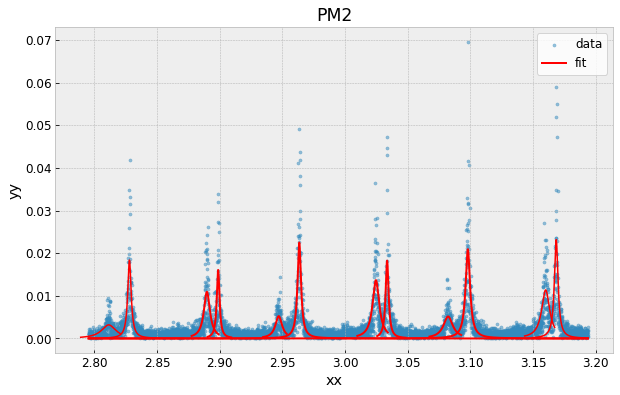

[2.811487926924859, 2.828057053960377, 2.8898583619205382, 2.898821670293267, 2.94715541368616, 2.9635505364711805, 3.024694119053016, 3.0336273805428577, 3.082285831208885, 3.0980188849606014, 3.1601280401785656, 3.168534301366742]


In [28]:
fitted_frequencies_pm2 = []

print(freqs[0][44200])
print(freqs[0][50500])

xdata = freqs[0][44200:50500]
ydata  = FT[1][44200:50500]
with plt.style.context('bmh'):
    plt.scatter(xdata, ydata, cmap = 'Blues', label='data', s=10, alpha=0.5)
    plt.rcParams.update({'font.size': 12})
    plt.title('PM2')
    plt.xlabel('xx')
    plt.ylabel('yy')
    

### fit 1 ###
guess = [200, 0.0002, 2.96358]

pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

with plt.style.context('bmh'):
    plt.plot(xdata, fit_y, '-', label='fit',color='red')

fitted_frequencies_pm2.append(pars[2])

### fit 2 ###
guess = [100, 0.002, 3.099]

pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

with plt.style.context('bmh'):
    plt.plot(xdata, fit_y, '-',color='red')
    
fitted_frequencies_pm2.append(pars[2])

### fit 3 ###
xdata = freqs[0][45500:45840]
ydata  = FT[1][45500:45840]
guess = [300, 0.00002, 2.889]

pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

with plt.style.context('bmh'):
    plt.plot(xdata, fit_y, '-',color='red')

fitted_frequencies_pm2.append(pars[2])

### fit 4 ###

xdata = freqs[0][45700:46000]
ydata  = FT[1][45700:46000]
guess = [300, 0.00002, 2.90]

pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

with plt.style.context('bmh'):
    plt.plot(xdata, fit_y, '-',color='red')
    
fitted_frequencies_pm2.append(pars[2])

### fit 5 ###

xdata = freqs[0][46400:46700]
ydata  = FT[1][46400:46700]
guess = [50, 0.00002, 2.9472]

pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

with plt.style.context('bmh'):
    plt.plot(xdata, fit_y, '-',color='red')

fitted_frequencies_pm2.append(pars[2])

### fit 6 ###

xdata = freqs[0][47590:47975]
ydata  = FT[1][47590:47975]
guess = [399, 0.00002, 3.024]

pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

with plt.style.context('bmh'):
    plt.plot(xdata, fit_y, '-',color='red')

fitted_frequencies_pm2.append(pars[2])

### fit 7 ###

xdata = freqs[0][47840:48200]
ydata  = FT[1][47840:48200]
guess = [300, 0.00002, 3.026]

pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

with plt.style.context('bmh'):
    plt.plot(xdata, fit_y, '-',color='red')

fitted_frequencies_pm2.append(pars[2])

### fit 8 ###

xdata = freqs[0][48500:48900]
ydata  = FT[1][48500:48900]
guess = [30, 0.00002, 3.082]

pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

with plt.style.context('bmh'):
    plt.plot(xdata, fit_y, '-',color='red')

fitted_frequencies_pm2.append(pars[2])

### fit 9 ###

xdata = freqs[0][44200:45400]
ydata  = FT[0][44200:45400]
guess = [30, 0.00002, 2.81]

pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

plt.plot(xdata, fit_y, '-',color='red')

fitted_frequencies_pm2.append(pars[2])

### fit 10 ###

xdata = freqs[0][44100:44600]
ydata  = FT[0][44100:44600]
guess = [30, 0.00002, 2.81]

pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

plt.plot(xdata, fit_y, '-',color='red')

fitted_frequencies_pm2.append(pars[2])

### fit 11 ###

xdata = freqs[0][49700:50080]
ydata  = FT[0][49700:50080]
guess = [30, 0.00002, 3.161]

pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

plt.plot(xdata, fit_y, '-',color='red')

fitted_frequencies_pm2.append(pars[2])

### fit 12 ###

xdata = freqs[0][49800:50500]
ydata  = FT[0][49800:50500]
guess = [30, 0.00002, 3.168]

pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

plt.plot(xdata, fit_y, '-',color='red')

fitted_frequencies_pm2.append(pars[2])

plt.legend()
plt.show()
fitted_frequencies_pm2.sort()
print(fitted_frequencies_pm2)

In [29]:
avg_fitted_frequencies = [(x + y)/2 for x, y in zip(fitted_frequencies_pm1, fitted_frequencies_pm2)]
err_avg_fitted_frequencies = abs(np.subtract(avg_fitted_frequencies,fitted_frequencies_pm1))

In [30]:
print(avg_fitted_frequencies)
print(err_avg_fitted_frequencies)

[2.8115025397856526, 2.8280572394087056, 2.889885767103455, 2.898814735865943, 2.9471763862362996, 2.963549126236831, 3.02479107239237, 3.033628567099297, 3.0823080873982276, 3.0980156359751194, 3.1599854935349168, 3.168570471466138]
[1.46128608e-05 1.85448329e-07 2.74051829e-05 6.93442732e-06
 2.09725501e-05 1.41023435e-06 9.69533394e-05 1.18655644e-06
 2.22561893e-05 3.24898548e-06 1.42546644e-04 3.61700994e-05]


# Graph of LS as a function of frequencies for l = 0, PM1 & PM2

[2.898807801438619, 3.0336297536557364, 3.1652430914506975, 3.2988901970716404, 2.629834667632197, 2.76132085179744]


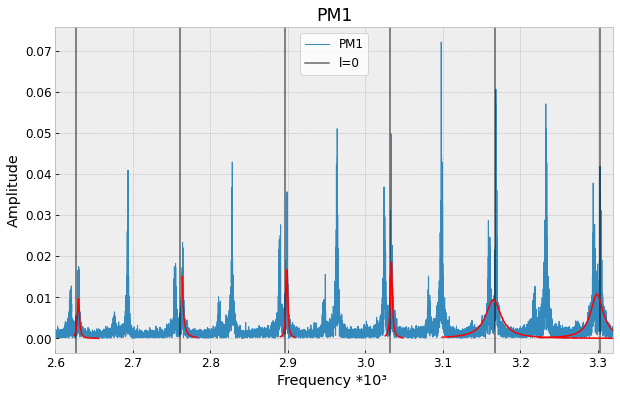

[2.898821670293267, 3.0336273805428577, 3.165304408055697, 3.2988669377518347, 2.629844398702377, 2.7641311282260133]


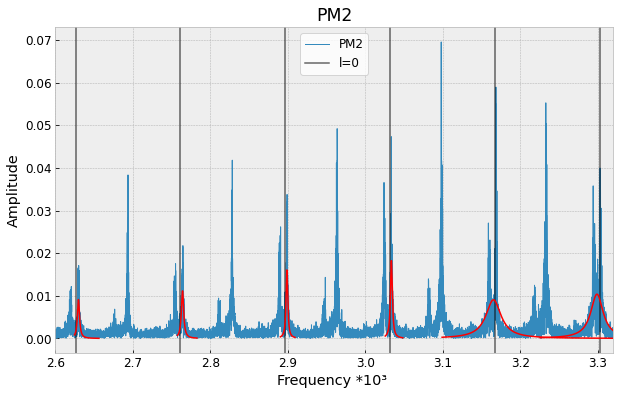

In [117]:
# PM1
xdata1 = freqs[0]
ydata1  = FT[0]

peaks_l0_pm1 =[]


with plt.style.context('bmh'):
    plt.xlim([2.6, 3.32])
    plt.title('PM1')
    plt.xlabel('Frequency *10³ ')
    plt.ylabel('Amplitude')
    plt.plot(xdata1, ydata1, label='PM1', linewidth=1, alpha=1)
    #plt.plot(xdata2, ydata2, label='PM2', linewidth=1, alpha=1)
    

k = 0
for i in frequencies_theory_l0:
    if k==1:
        plt.axvline(x = i, color = 'black', alpha=0.6, label = 'l=0')
    else:
        plt.axvline(x = i, color = 'black', alpha=0.6)
    k += 1

######## PM1 ########

### fit 1 pm1 ###

xdata = freqs[0][45700:46000]
ydata  = FT[0][45700:46000]
guess = [300, 0.00002, 2.90]

pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

plt.plot(xdata, fit_y, '-', color='red')

peaks_l0_pm1.append(pars[2])

### fit 2 pm1 ###

xdata = freqs[0][47840:48200]
ydata  = FT[0][47840:48200]
guess = [300, 0.00002, 3.026]

pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

plt.plot(xdata, fit_y, '-', color='red')

peaks_l0_pm1.append(pars[2])
    
### fit 3 pm1 ###

xdata = freqs[0][49000:53000]
ydata  = FT[0][49000:53000]
guess = [0.000280461329, 0.00818529237, 3.16597460]
pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

plt.plot(xdata, fit_y, '-',color='red')
    
peaks_l0_pm1.append(pars[2])

### fit 4 pm1 ###

xdata = freqs[0][51000:53000]
ydata  = FT[0][51000:53000]
guess = [0.000280461329, 0.00818529237, 3.3]
pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

plt.plot(xdata, fit_y, '-',color='red')

peaks_l0_pm1.append(pars[2])

### fit 5 pm1 ###

xdata = freqs[0][41500:42000]
ydata  = FT[0][41500:42000]
guess = [0.000280461329, 0.00818529237, 2.6265]
pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

plt.plot(xdata, fit_y, '-',color='red')

peaks_l0_pm1.append(pars[2])

### fit 6 pm1 ###

xdata = freqs[0][43700:44000]
ydata  = FT[0][43700:44000]
guess = [0.000280461329, 0.00818529237, 2.6265]
pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

plt.plot(xdata, fit_y, '-',color='red')
    
peaks_l0_pm1.append(pars[2])

print(peaks_l0_pm1)


plt.legend()
plt.show()

######## PM2 ########

# PM2
xdata2 = freqs[0]
ydata2  = FT[1]

peaks_l0_pm2 =[]


with plt.style.context('bmh'):
    plt.xlim([2.6, 3.32])
    plt.title('PM2')
    plt.xlabel('Frequency *10³ ')
    plt.ylabel('Amplitude')
    plt.plot(xdata2, ydata2, label='PM2', linewidth=1, alpha=1)
    

k = 0
for i in frequencies_theory_l0:
    if k==1:
        plt.axvline(x = i, color = 'black', alpha=0.6, label = 'l=0')
    else:
        plt.axvline(x = i, color = 'black', alpha=0.6)
    k += 1


### fit 1 pm2 ###

xdata = freqs[0][45700:46000]
ydata  = FT[1][45700:46000]
guess = [300, 0.00002, 2.90]

pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

plt.plot(xdata, fit_y, '-', color='red')

peaks_l0_pm2.append(pars[2])

### fit 2 pm2 ###

xdata = freqs[0][47840:48200]
ydata  = FT[1][47840:48200]
guess = [300, 0.00002, 3.026]

pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

plt.plot(xdata, fit_y, '-', color='red')

peaks_l0_pm2.append(pars[2])
    
### fit 3 pm2 ###

xdata = freqs[0][49000:53000]
ydata  = FT[1][49000:53000]
guess = [0.000280461329, 0.00818529237, 3.16597460]
pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

plt.plot(xdata, fit_y, '-',color='red')
    
peaks_l0_pm2.append(pars[2])

### fit 4 pm2 ###

xdata = freqs[0][51000:53000]
ydata  = FT[1][51000:53000]
guess = [0.000280461329, 0.00818529237, 3.3]
pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

plt.plot(xdata, fit_y, '-',color='red')

peaks_l0_pm2.append(pars[2])

### fit 5 pm2 ###

xdata = freqs[0][41500:42000]
ydata  = FT[1][41500:42000]
guess = [0.000280461329, 0.00818529237, 2.6265]
pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

plt.plot(xdata, fit_y, '-',color='red')

peaks_l0_pm2.append(pars[2])

### fit 6 pm2 ###

xdata = freqs[0][43600:44000]
ydata  = FT[1][43600:44000]
guess = [0.000280461329, 0.00818529237, 2.6265]
pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

plt.plot(xdata, fit_y, '-',color='red')
    
peaks_l0_pm2.append(pars[2])

print(peaks_l0_pm2)


plt.legend()
plt.show()

n | theoretical frequencies | fitted frequencies | teo freq(n+1)-freq(n) | exp freq(n+1)-freq(n)

18		2.626554      2.629834667632197      0.134895      0.13148618416 

19		2.761449      2.76132085179744       0.134965      0.13748695704

20      2.896414      2.898807808841091      0.135212      0.12608024439

21      3.031626      3.024888053234040      0.135294      0.14035503821

22		3.16692       3.1652430914506975     0.135565      0.13364710562

23		3.302485      3.2988901970716404

Fitting to more peaks in lower frequencies or higher

0 0 0
1 0 1
2 1 0
3 1 1


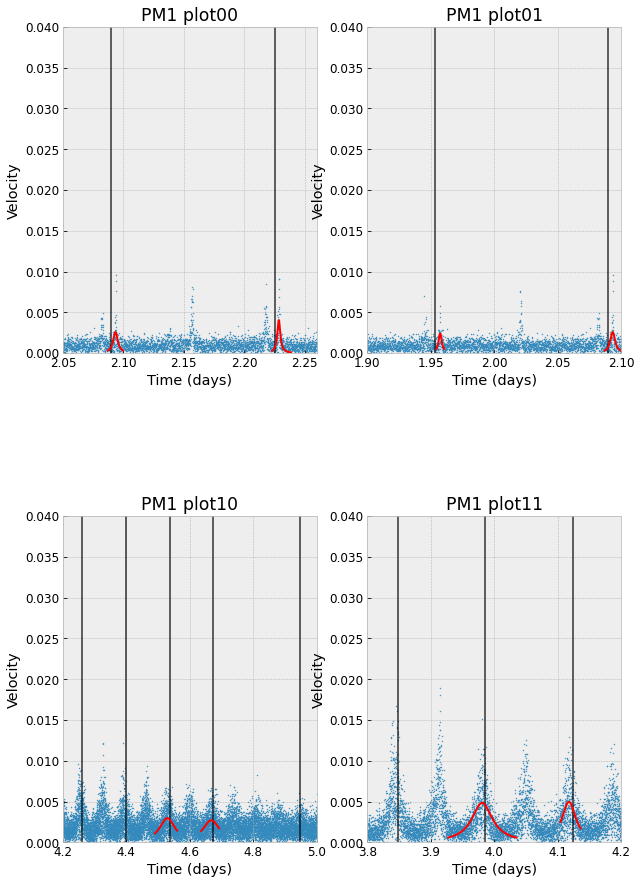

0 0 0
1 0 1
2 1 0
3 1 1


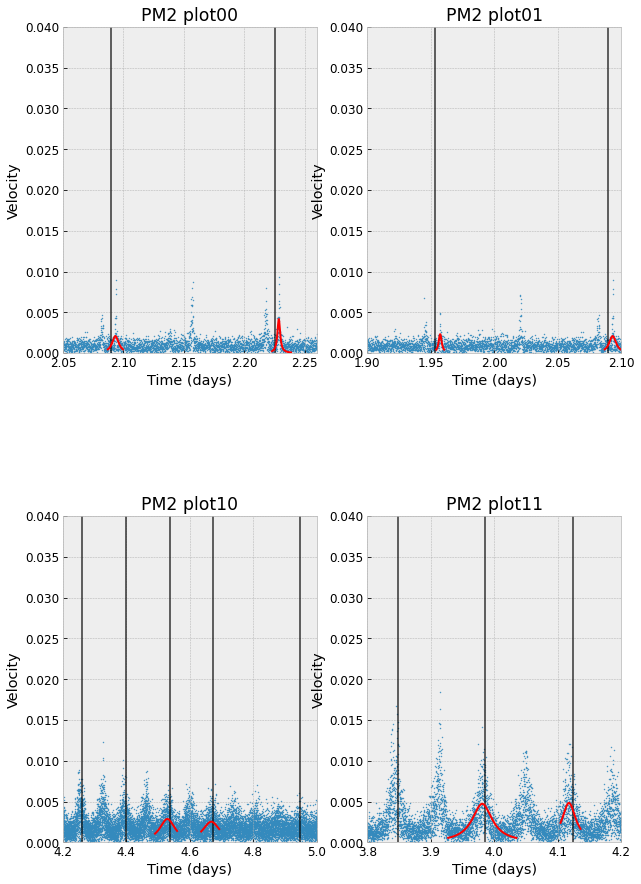

In [89]:
########## PM 1 ########## 
# making 4 plot image    
with plt.style.context('bmh'):
    
    plt.rcParams.update({'font.size': 12})    
    plt.rcParams["figure.figsize"] = (10,10)
    
    fig, ax = plt.subplots(2, 2,figsize=(10, 15))
    plt.subplots_adjust(hspace=0.5)

    j = 0
    tit = 0
    for i in range(4):
        k = 0
        if np.mod(i,2)!=0:
            k = 1
                       
        print(i, j, k)
        
        for line in frequencies_theory_l0:
            ax[j][k].axvline(x = line, color = 'black', alpha=0.6)
    
        if i == 0:
            ### fit 1 & 2 ###

            xdata = freqs[0][35150:35400]
            ydata  = FT[0][35150:35400]

            ax[j][k].set_xlim([2.05,2.26])
            ax[j][k].set_ylim([0,0.04])

            guess = [300, 0.00002, 2.225]

            pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
            fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

            ax[j][k].plot(xdata, fit_y, '-', color='red')

            peaks_l0_pm1.append(pars[2])
            
            xdata = freqs[0][33000:33200]
            ydata  = FT[0][33000:33200]

            guess = [300, 0.00002, 2.09]

            pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
            fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

            ax[j][k].plot(xdata, fit_y, '-', color='red')

            peaks_l0_pm1.append(pars[2])
            
        elif i == 1:
            
            ### fit 3 & 4 ###

            xdata = freqs[0][30900:31000]
            ydata  = FT[0][30900:31000]
            guess = [1, 0.00002, 1.955]

            ax[j][k].set_xlim([1.900,2.1])
            ax[j][k].set_ylim([0,0.04])

            pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
            fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

            ax[j][k].plot(xdata, fit_y, '-', color='red')

            peaks_l0_pm1.append(pars[2])
            
            xdata = freqs[0][33000:33200]
            ydata  = FT[0][33000:33200]

            guess = [300, 0.00002, 2.09]

            pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
            fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

            ax[j][k].plot(xdata, fit_y, '-', color='red')
            
        elif i == 2:
            ### fit 5 & 6 ###

            xdata = freqs[0][71000:72100]
            ydata  = FT[0][71000:72100]
            guess = [100, 0.00002, 4.53]

            ax[j][k].set_xlim([4.2,5])
            ax[j][k].set_ylim([0,0.04])

            pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
            fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

            ax[j][k].plot(xdata, fit_y, '-', color='red')

            peaks_l0_pm1.append(pars[2])
            
            xdata = freqs[0][73300:74200]
            ydata  = FT[0][73300:74200]

            guess = [300, 0.00002, 4.67]

            pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
            fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

            ax[j][k].plot(xdata, fit_y, '-', color='red')
            
            peaks_l0_pm1.append(pars[2])
            
        elif i == 3:
            ### fit 7 & 8 ###

            xdata = freqs[0][64900:65400]
            ydata  = FT[0][64900:65400]
            guess = [100, 0.00002, 4.12]

            ax[j][k].set_xlim([3.8,4.2])
            ax[j][k].set_ylim([0,0.04])

            pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
            fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

            ax[j][k].plot(xdata, fit_y, '-', color='red')

            peaks_l0_pm1.append(pars[2])
            
            xdata = freqs[0][62100:63800]
            ydata  = FT[0][62100:63800]

            guess = [300, 0.00002, 3.98]

            pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
            fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

            ax[j][k].plot(xdata, fit_y, '-', color='red')
            
            peaks_l0_pm1.append(pars[2])
    


        ax[j][k].set_title('PM1 plot{}{}'.format(j,k))
        
        
        ax[j][k].scatter(xdata1, ydata1, cmap = 'Blues', alpha=0.8,s=1)
    
        
        ax[j][k].set_xlabel('Time (days)')

        ax[j][k].set_ylabel('Velocity')
        
        if np.mod(i,2)!=0:
            j = j+1
        tit += 1
    
    plt.show()
    
########## PM 2 ########## 
# making 4 plot image    
with plt.style.context('bmh'):
    
    plt.rcParams.update({'font.size': 12})    
    plt.rcParams["figure.figsize"] = (10,10)
    
    fig, ax = plt.subplots(2, 2,figsize=(10, 15))
    plt.subplots_adjust(hspace=0.5)

    j = 0
    tit = 0
    for i in range(4):
        k = 0
        if np.mod(i,2)!=0:
            k = 1
                       
        print(i, j, k)
        
        for line in frequencies_theory_l0:
            ax[j][k].axvline(x = line, color = 'black', alpha=0.6)
    
        if i == 0:
            ### fit 1 & 2 ###

            xdata = freqs[0][35150:35400]
            ydata  = FT[1][35150:35400]

            ax[j][k].set_xlim([2.05,2.26])
            ax[j][k].set_ylim([0,0.04])

            guess = [300, 0.00002, 2.225]

            pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
            fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

            ax[j][k].plot(xdata, fit_y, '-', color='red')

            peaks_l0_pm2.append(pars[2])
            
            xdata = freqs[0][33000:33200]
            ydata  = FT[1][33000:33200]

            guess = [300, 0.00002, 2.09]

            pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
            fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

            ax[j][k].plot(xdata, fit_y, '-', color='red')

            peaks_l0_pm2.append(pars[2])
            
            
            
        elif i == 1:
            
            ### fit 3 & 4 ###

            xdata = freqs[0][30900:31000]
            ydata  = FT[1][30900:31000]
            guess = [1, 0.00002, 1.955]

            ax[j][k].set_xlim([1.900,2.1])
            ax[j][k].set_ylim([0,0.04])

            pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
            fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

            ax[j][k].plot(xdata, fit_y, '-', color='red')

            peaks_l0_pm2.append(pars[2])
            
            xdata = freqs[0][33000:33200]
            ydata  = FT[1][33000:33200]

            guess = [300, 0.00002, 2.09]

            pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
            fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

            ax[j][k].plot(xdata, fit_y, '-', color='red')
            
        elif i == 2:
            ### fit 5 & 6 ###

            xdata = freqs[0][71000:72100]
            ydata  = FT[1][71000:72100]
            guess = [100, 0.00002, 4.53]

            ax[j][k].set_xlim([4.2,5])
            ax[j][k].set_ylim([0,0.04])

            pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
            fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

            ax[j][k].plot(xdata, fit_y, '-', color='red')

            peaks_l0_pm2.append(pars[2]) 
            
            xdata = freqs[0][73300:74200]
            ydata  = FT[1][73300:74200]

            guess = [300, 0.00002, 4.67]

            pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
            fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

            ax[j][k].plot(xdata, fit_y, '-', color='red')
            
            peaks_l0_pm2.append(pars[2])
            
        elif i == 3:
            ### fit 7 & 8 ###

            xdata = freqs[0][64900:65400]
            ydata  = FT[1][64900:65400]
            guess = [100, 0.00002, 4.12]

            ax[j][k].set_xlim([3.8,4.2])
            ax[j][k].set_ylim([0,0.04])

            pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
            fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

            ax[j][k].plot(xdata, fit_y, '-', color='red')

            peaks_l0_pm2.append(pars[2])    
             
            xdata = freqs[0][62100:63800]
            ydata  = FT[1][62100:63800]

            guess = [300, 0.00002, 3.98]

            pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
            fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

            ax[j][k].plot(xdata, fit_y, '-', color='red')
            
            peaks_l0_pm2.append(pars[2])
            

        ax[j][k].set_title('PM2 plot{}{}'.format(j,k))
        
        
        ax[j][k].scatter(xdata2, ydata2, cmap = 'Blues', alpha=0.8,s=1)
    
        
        ax[j][k].set_xlabel('Time (days)')

        ax[j][k].set_ylabel('Velocity')
        
        if np.mod(i,2)!=0:
            j = j+1
        tit += 1
    
    plt.show()

Finding average frequencies and errors

In [92]:
print(peaks_l0_pm1)

peaks_l0_pm1.sort()
peaks_l0_pm2.sort()

print(len(peaks_l0_pm1))
      
print(len(peaks_l0_pm2))

avg_peaks_l0 = [(x + y)/2 for x, y in zip(peaks_l0_pm1, peaks_l0_pm2)]

err_avg_fitted_frequencies = abs(np.subtract(avg_peaks_l0,peaks_l0_pm1))

print('Average frequencies = ', avg_peaks_l0)

print('Error = ', err_avg_fitted_frequencies)

[1.9574538750727843, 2.0934714944480546, 2.2287131125389137, 2.629834667632197, 2.76132085179744, 2.898807801438619, 3.0336297536557364, 3.1652430914506975, 3.2988901970716404, 3.9810902370621135, 4.117922458669391, 4.529211828248574, 4.667923182965998]
13
13
Average frequencies =  [1.9574503298036314, 2.0934541735425025, 2.228711835602372, 2.629839533167287, 2.7618291887417867, 2.898814735865943, 3.033628567099297, 3.1652737497531973, 3.2988785674117374, 3.9811275839467877, 4.117960111217405, 4.529292286338611, 4.667856679161375]
Error =  [3.54526915e-06 1.73209056e-05 1.27693654e-06 4.86553509e-06
 5.08336944e-04 6.93442732e-06 1.18655644e-06 3.06583025e-05
 1.16296599e-05 3.73468847e-05 3.76525480e-05 8.04580900e-05
 6.65038046e-05]


Large separation is now computed in the google sheets. Let's now plot the values we found.

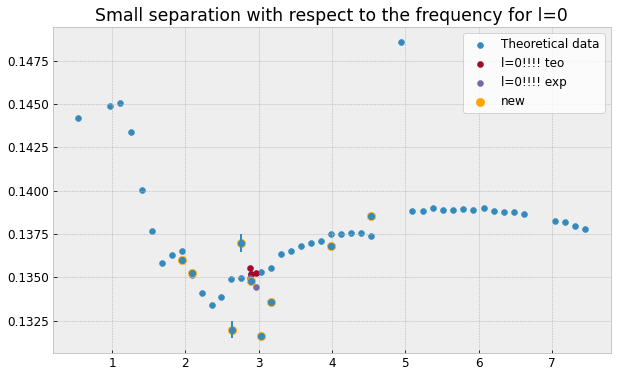

In [124]:
# l0, l1, l2

yteo = [0.135212, 0.135234, 0.135535]
yexp = [0.13482194481464527, 0.13446248273809314, 0.13497482981531972]

x = [2.896414, 2.959557, 2.885445]

# just l0

plt_avg_peaks_l0 = [1.95745033, 2.093454174, 2.629839533, 2.761829189, 2.898814736, 3.033628567, 3.16527375, 3.981127584, 4.529292286]
small_separations_l0 = [0.1360038437, 0.1352576621, 0.1319896556, 0.1369855471, 0.1348138312, 0.1316451827, 0.1336048177, 0.1368325273, 0.1385643928]
err_small_separations_l0 = [0.0000176800086015266, 0.0000173679111504895, 0.0005083602286439910, 0.0005083842394464210, 0.0000070352113288563, 0.0000306812553257981, 0.0000327899451291272, 0.0000530330478823101, 0.0001043851535072070]

# 1sy attempt
with plt.style.context('bmh'):
    plt.scatter(teo_freq, teo_sep, label='Theoretical data')
    plt.scatter(x, yteo, label='l=0!!!! teo')
    plt.scatter(x, yexp, label='l=0!!!! exp')
    plt.title('Small separation with respect to the frequency for l=0')
    
    #new
    plt.scatter(plt_avg_peaks_l0, small_separations_l0, s=70, label = 'new', color = 'orange')
    plt.errorbar(plt_avg_peaks_l0, small_separations_l0, yerr = err_small_separations_l0, fmt ='o')


plt.legend()
plt.show()

In [102]:
aux = avg_peaks_l0.pop(11)
"""
aux.append(avg_peaks_l0[0:2])
aux.append(avg_peaks_l0[3:8])
#+ avg_peaks_l0[9] + avg_peaks_l0[11]"""
print(aux)

4.529292286338611


plot for l = 0 the theoretical small separation as a function of the frequencies

DO THE SAME BUT FOR THE DATA WITH PM 2 AND COMPARE THE TWO PLOTS